In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [622]:
df = pd.read_csv('/content/claimants.csv')
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [623]:
#casenum is unecessary column for prediction, so lets drop it

df.drop(columns = ['CASENUM'], inplace =True)

In [624]:
df.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891


In [625]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


<Axes: >

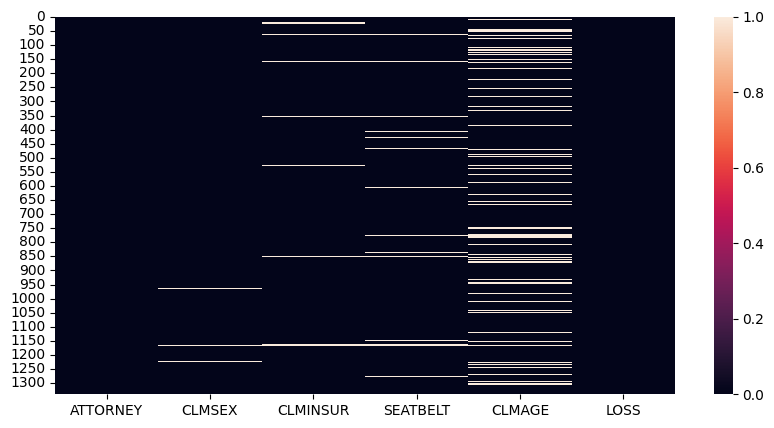

In [626]:
plt.rcParams ['figure.figsize'] = (10,5)
plt.rcParams ['figure.dpi'] = 100
sns.heatmap(df.isna())

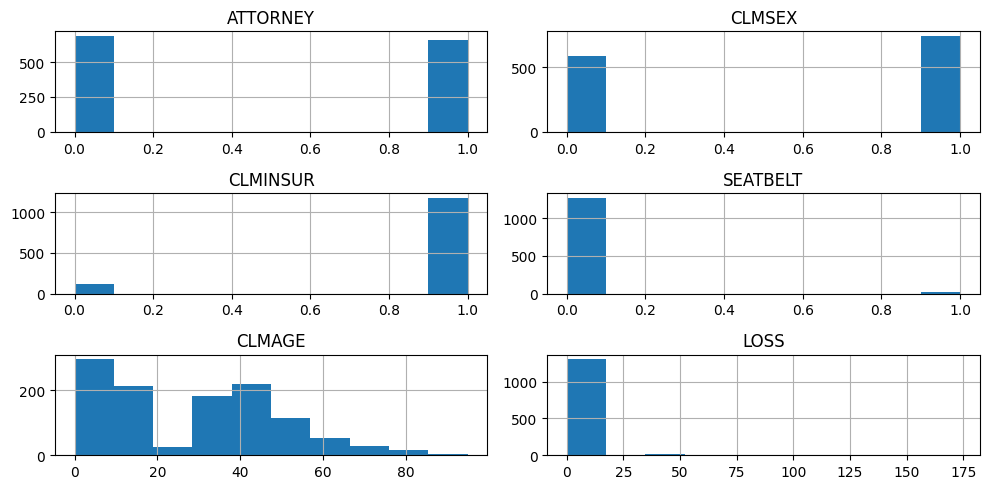

In [627]:
df.hist()
plt.tight_layout()

In [628]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [629]:
df['CLMSEX'].fillna(df['CLMSEX'].mode()[0], inplace = True)

In [630]:
df.isna().sum()

ATTORNEY      0
CLMSEX        0
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [631]:
#to impute everthing at the together, we can use simple imputer

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'most_frequent')           #always assign the class we import to a object, so we can call si.something than typing simpleimputer.something
                                                         #and most frequnet is mode

In [632]:
df.iloc[:, :-1]

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE
0,0,0.0,1.0,0.0,50.0
1,1,1.0,0.0,0.0,18.0
2,1,0.0,1.0,0.0,5.0
3,0,0.0,1.0,1.0,31.0
4,1,0.0,1.0,0.0,30.0
...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN
1336,0,1.0,1.0,0.0,46.0
1337,1,1.0,1.0,0.0,39.0
1338,0,1.0,0.0,0.0,8.0


In [633]:
df.iloc[:, :-1] = si.fit_transform(df.iloc[:, :-1])      #fit will perform the calculations, transform with do the action, here fit calculates mode and transform replaces with mode

In [634]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

**Splitting the data**

In [635]:
from sklearn.model_selection import train_test_split

In [636]:
df.head(2)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,0.0,1.0,0.0,50.0,34.940
1,1.0,1.0,0.0,0.0,18.0,0.891


In [637]:
#here our target column is attorney, we want to predict this, so this will be our Y
#X will contain the rest of the necessary record, that will be all the cols except attorney col

x = df.iloc[:,1:]
y = df.iloc[:,0]

In [638]:
x.head(2)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891


In [639]:
y.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: ATTORNEY, dtype: float64

**Splitting for Training and Testing**

In [640]:
#we are creating 4 variables
xtrain,xtest,ytrain,ytest = train_test_split (x, y, train_size = 0.75, random_state=1)   #test size = 25%, so rest 75% will be automatically taken for training

In [641]:
df.shape

(1340, 6)

In [642]:
xtrain.shape

(1005, 5)

In [643]:
xtest.shape

(335, 5)

In [644]:
ytrain.shape

(1005,)

In [645]:
#to put these arrays back to dataframe again

pd.DataFrame(xtrain)

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1045,1.0,1.0,0.0,37.0,0.935
969,0.0,1.0,0.0,14.0,10.869
594,1.0,1.0,0.0,43.0,0.007
1081,1.0,1.0,0.0,77.0,1.000
1053,1.0,1.0,0.0,58.0,9.485
...,...,...,...,...,...
715,0.0,1.0,0.0,13.0,6.979
905,0.0,1.0,0.0,10.0,3.330
1096,0.0,1.0,0.0,50.0,3.095
235,1.0,1.0,0.0,17.0,1.619


In [646]:
# to braing back along with the column name, just add the column names inside the paranthesis

data = pd.DataFrame(xtrain, columns = x.columns)  #here since we already have the column names in x variable stored, we can just call x.columns
data

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1045,1.0,1.0,0.0,37.0,0.935
969,0.0,1.0,0.0,14.0,10.869
594,1.0,1.0,0.0,43.0,0.007
1081,1.0,1.0,0.0,77.0,1.000
1053,1.0,1.0,0.0,58.0,9.485
...,...,...,...,...,...
715,0.0,1.0,0.0,13.0,6.979
905,0.0,1.0,0.0,10.0,3.330
1096,0.0,1.0,0.0,50.0,3.095
235,1.0,1.0,0.0,17.0,1.619


**Model Building**

In [647]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [648]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [649]:
print(f"Actual Y {ytest[:20].values}")
print(f"Predicted Y {ypred[:20]}")

Actual Y [1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.]
Predicted Y [1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]


In [650]:
print(ytest[:20].values)
print(ypred[:20])

[1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.]


In [651]:
df['ATTORNEY'].value_counts()   #if count of one value is very higher then model will learn more about only that value and predict that value more
                                #here since 0 is more, model will learn more about 0. this difference is negligible. It should not e like 800 values of 1 and 200 values of 0

0.0    685
1.0    655
Name: ATTORNEY, dtype: int64

**Model Evaluation**

In [652]:
from sklearn.metrics import confusion_matrix,classification_report

In [653]:
confusion_matrix (ytest, ypred)

array([[ 96,  70],
       [ 39, 130]])

Text(95.72222222222221, 0.5, 'Predicted Values')

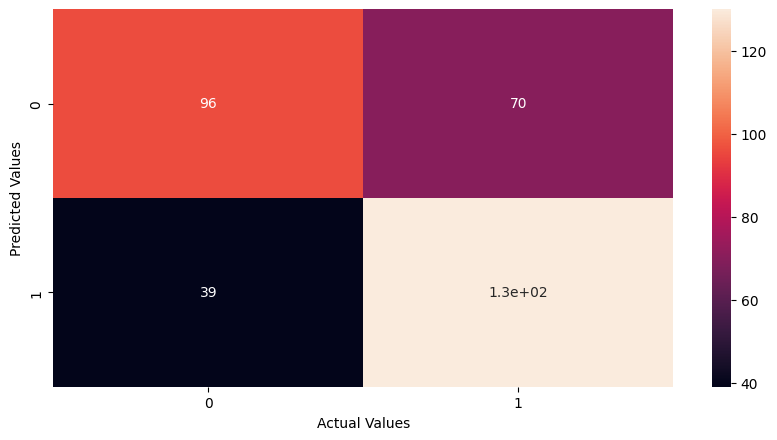

In [654]:
sns.heatmap(confusion_matrix(ytest, ypred), annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [655]:
print(classification_report (ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.71      0.58      0.64       166
         1.0       0.65      0.77      0.70       169

    accuracy                           0.67       335
   macro avg       0.68      0.67      0.67       335
weighted avg       0.68      0.67      0.67       335



In [656]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, ypred)

0.6746268656716418

**Threshold selection**

In [657]:
proba = lg.predict_proba(xtest)
proba

array([[3.11144120e-01, 6.88855880e-01],
       [3.24648283e-01, 6.75351717e-01],
       [4.30600922e-01, 5.69399078e-01],
       [3.78822979e-01, 6.21177021e-01],
       [5.81113155e-01, 4.18886845e-01],
       [3.75663074e-01, 6.24336926e-01],
       [3.21990087e-01, 6.78009913e-01],
       [5.51828053e-01, 4.48171947e-01],
       [3.54727843e-01, 6.45272157e-01],
       [3.18939867e-01, 6.81060133e-01],
       [4.48166845e-01, 5.51833155e-01],
       [3.70868463e-01, 6.29131537e-01],
       [3.81157100e-01, 6.18842900e-01],
       [5.87930507e-01, 4.12069493e-01],
       [3.38242362e-01, 6.61757638e-01],
       [5.66945848e-01, 4.33054152e-01],
       [4.39492408e-01, 5.60507592e-01],
       [4.48705920e-01, 5.51294080e-01],
       [3.43139924e-01, 6.56860076e-01],
       [3.38103574e-01, 6.61896426e-01],
       [3.09810573e-01, 6.90189427e-01],
       [4.16836162e-01, 5.83163838e-01],
       [6.11391880e-01, 3.88608120e-01],
       [4.16684845e-01, 5.83315155e-01],
       [4.075559

In [658]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([6.88855880e-01, 6.75351717e-01, 5.69399078e-01, 6.21177021e-01,
       4.18886845e-01, 6.24336926e-01, 6.78009913e-01, 4.48171947e-01,
       6.45272157e-01, 6.81060133e-01, 5.51833155e-01, 6.29131537e-01,
       6.18842900e-01, 4.12069493e-01, 6.61757638e-01, 4.33054152e-01,
       5.60507592e-01, 5.51294080e-01, 6.56860076e-01, 6.61896426e-01,
       6.90189427e-01, 5.83163838e-01, 3.88608120e-01, 5.83315155e-01,
       5.92444005e-01, 6.32844482e-01, 6.95821218e-01, 6.16268353e-01,
       6.14425301e-01, 6.70897710e-01, 5.84146690e-01, 6.13689043e-01,
       5.48725074e-01, 2.49445061e-01, 2.61416934e-01, 6.16636707e-01,
       3.52171747e-01, 4.66878722e-01, 6.45329366e-01, 6.95755475e-01,
       6.88521969e-01, 1.46441194e-04, 4.84821805e-01, 5.29562426e-01,
       5.77763722e-01, 3.93516804e-01, 7.04906702e-01, 6.71103837e-01,
       6.12949863e-01, 5.96184376e-01, 5.83451540e-01, 6.76034024e-01,
       6.75350951e-01, 5.66266819e-01, 5.55590075e-01, 6.44187141e-01,
      

In [659]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

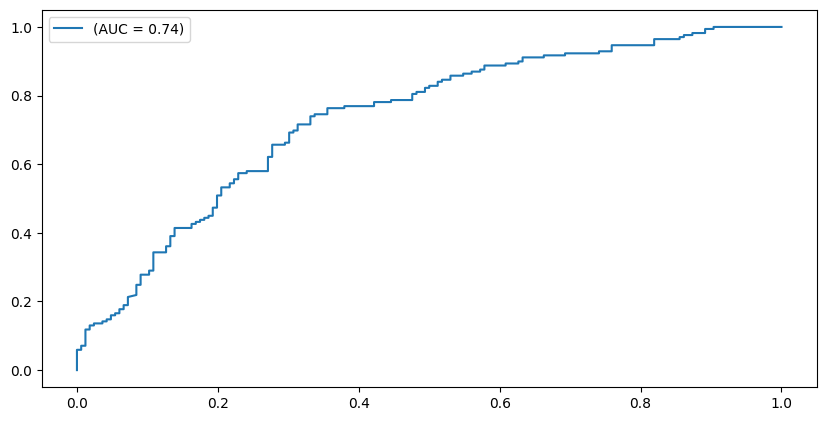

In [660]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [661]:
threshold 

array([1.71681219e+00, 7.16812187e-01, 6.97861658e-01, 6.97138572e-01,
       6.95821218e-01, 6.95755475e-01, 6.91187382e-01, 6.91187202e-01,
       6.90522122e-01, 6.90388970e-01, 6.90189427e-01, 6.89923423e-01,
       6.88855880e-01, 6.88521969e-01, 6.87987387e-01, 6.87184446e-01,
       6.86514499e-01, 6.84837438e-01, 6.84836528e-01, 6.84433147e-01,
       6.82479782e-01, 6.81060133e-01, 6.80113488e-01, 6.78009913e-01,
       6.75351717e-01, 6.75350951e-01, 6.70690426e-01, 6.70415302e-01,
       6.62593611e-01, 6.61896426e-01, 6.60989635e-01, 6.59102941e-01,
       6.57632725e-01, 6.49594572e-01, 6.47322871e-01, 6.45685560e-01,
       6.45329366e-01, 6.42772967e-01, 6.42044535e-01, 6.39319281e-01,
       6.35070399e-01, 6.34146368e-01, 6.33481769e-01, 6.32844482e-01,
       6.31598955e-01, 6.30148580e-01, 6.29131537e-01, 6.27604557e-01,
       6.26890029e-01, 6.25431828e-01, 6.24761245e-01, 6.24336926e-01,
       6.22948046e-01, 6.22144391e-01, 6.17151768e-01, 6.17064247e-01,
      

In [662]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [663]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
81,5.555901e-01,0.704478
84,5.417768e-01,0.701493
82,5.520642e-01,0.701493
80,5.574250e-01,0.701493
78,5.686368e-01,0.698507
...,...,...
4,6.958212e-01,0.522388
2,6.978617e-01,0.522388
139,1.451402e-15,0.507463
1,7.168122e-01,0.495522


In [664]:
from sklearn.preprocessing import binarize

In [665]:
final_ypred = binarize([proba], threshold=0.536)[0]       #[0] to convet to 1D array

In [666]:
print(classification_report(ytest,final_ypred))

              precision    recall  f1-score   support

         0.0       0.73      0.64      0.68       166
         1.0       0.69      0.76      0.72       169

    accuracy                           0.70       335
   macro avg       0.71      0.70      0.70       335
weighted avg       0.71      0.70      0.70       335



In [667]:
confusion_matrix(ytest,final_ypred)

array([[107,  59],
       [ 40, 129]])

In [667]:
#Recall Value has Incresed, False Negetive has reduced from 54 to 40